# 計量経済学 単回帰分析

一橋大学大学院経済学研究科 原泰史

ここでは前半に引き続き、日本中の経済学部/経営学部に存在する「計量経済学」という講義の中で最初にドアをノックすることで有名な回帰分析を、Python を通じて学習することを目指します。Google Colaboratory 上で実行出来るようになっていますので、適宜コードを実行して頂ければと思います。

具体的には

* 回帰係数の推定
* 決定係数の導出
* 回帰係数の検定
* Statsmodelsを使った分析

などについて、その概要およびPython での実行方法を履修していただきます。

実行の際には、[ファイル]-[ドライブにコピーを保存]から、Notebook を自らのGoogle アカウントにコピーする作業を行ってください。



## サンプルデータセットの読み込み

まずはサンプルのデータセットを読み込みます。Day2+3と同じものです。

In [ ]:
#ボストンのデータセットを読み込む
from sklearn.datasets import load_boston
boston = load_boston() 

In [ ]:
#データの中身を確認する
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
#Pandas をインポートする
import pandas as pd

#X の値を取り出す
X = pd.DataFrame(boston.data, columns=boston.feature_names)
#Y の値を取り出す
#名前を指定する
y_name={"price"}
Y = pd.DataFrame(boston.target, columns=y_name)

In [ ]:
#Xの中身を確認する
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#Yの中身を確認する
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 単回帰分析

### 回帰係数の推定

回帰分析は変数間の因果関係を明らかにするための統計的な手法です。たとえば、ある値XとYが存在するとします。このふたつの変数の関係を、以下のような式で示す。ここでのiは、それぞれの分析単位ごとの値を示しています。たとえば、国や企業や学生など、特定の集合の中から抽出された群の値の束が, iからnまで存在していることを考えます。

$$ Y_i + \alpha_i + \beta X_i + u_i   
, i =1,2,..., n$$

こうした式を、単純回帰モデルと呼びます。また、このときXは説明変数もしくは独立変数と呼ぶ。Yを被説明変数もしくは従属変数と呼びます。uは誤差項もしくは撹乱項と呼び、Yの値を、Xの値すべてからは説明出来ないときの「ズレ」を示しています。

こうした関係性を求めるために、広く用いられているのが最小二乗法 (OLS) になります。

XとYの値を用いて、先程のαおよびβを求めると、以下のような関係が成り立ちます。

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}X$$

ここでは、αやβの推定値（係数）を求めていることになります。上に「ハット」がついたYは、実績値であるXおよび推定値（係数）αおよびβに対応した値となり、Yの理論値(もしくは、推定値、予測値etc...)などと呼びます。

これらの係数を求める公式は以下の通りです。

$$ \hat{\beta} = \frac{n\sum{XY}-\sum{X}\sum{Y}}{n\sum{X^2-(\hat{X})^2}} 
= \frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{\sum{(X-\bar{X})^2}} $$

$$ \hat{\alpha} = \frac{\sum{X^2}\sum{Y}-\sum{X}\sum{XY}}{n\sum{X^2}-(\sum{X})^2} = \bar{Y} - \hat{\beta}\bar{X} $$

ところで、YとXとの関係性をひとつの直線で説明しようとすると、かならずどこかで「ズレ」が起きることになります。これを、残差と呼ぶことにしましょう。すなわち、残差は観測値の理論値との差ということになります。これを式で示すと、

$$ \hat{u} = Y - \hat{Y} = Y - (\hat{\alpha} + \hat{\beta}X) $$

となります。これらを右辺と左辺でそれぞれ自乗しi個分足し合わせる、すなわち総和を求めると、以下の式が与えられます。このとき、残差の二乗の総和を求めるので、残差２乗和もしくは残差平方和と呼びます。

$$ \sum{\hat{u}}^2 = \sum [Y - (\hat{\alpha} + \hat{\beta}X)]^2 $$

ここで、残差２乗和が最小になるような値を求めるには、αとβでそれぞれ偏微分を行います。すなわち、FOC (一階の条件) を求めると

$$ \frac{\delta\sum{\hat{u}}^2}{\delta\hat{\alpha}} = -2 \sum (Y - \hat{\alpha} - \hat{\beta}X) = 0 $$

$$ \frac{\delta\sum{\hat{u}}^2}{\delta\hat{\beta}} = -2 \sum X(Y - \hat{\alpha} - \hat{\beta}X) = 0 $$

となります。

これらの式を整理すると、以下の連立方程式が与えられます。

$$ \sum{Y} = n \hat{\alpha} + \hat{\beta} \sum{X} $$
$$ \sum{XY} = \hat{\alpha}\sum{X} + \hat{\beta} \sum{X}^2 $$

これらの方程式をβ、αについて解法することで、

$$ \hat{\beta} = \frac{n\sum{XY}-\sum{X}\sum{Y}}{n\sum{X^2-(\hat{X})^2}} 
= \frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{\sum{(X-\bar{X})^2}} $$

$$ \hat{\alpha} = \frac{\sum{X^2}\sum{Y}-\sum{X}\sum{XY}}{n\sum{X^2}-(\sum{X})^2} = \bar{Y} - \hat{\beta}\bar{X} $$

と、回帰式による係数αとβを求めることが出来ます。

と、ここまで数式をずっと並べてみたのですがあまりピンとこないので、実際の値を当てはめて、αとβを計算してみたいと思います。

計算にはサンプルデータセットのうち、Price(Y) とAge（X)を利用します。
ボストンの不動産価格(Y)が、その建物の年齢(X)によって説明付けられるモデルを解法することになります。


In [ ]:
import numpy as np
#Yの値を指定する. ここではPrice.
Y
#Xの値を指定する.ここではAge.
X_AGE=X.AGE

#Yの平均値を求める
Y_AVE=np.average(Y)
print("Y_Average", Y_AVE)

#Yの平均値を求める
X_AVE=np.average(X_AGE)
print("X_Average", X_AVE)

#データ処理用にYをDataFrameからSeries に変換する
Y_data=Y["price"]

#Yの合計値を求める
Y_SUM=np.sum(Y_data)
print("Y_Sum", Y_SUM)

#Yの合計値を求める
X_SUM=np.sum(X_AGE)
print("X_Sum", X_SUM)

#Xの自乗値の和を求める
X_POWER=np.sum(np.power(X_AGE,2))
print("X_POWER", X_POWER)

#XとYをかけ合わせる
XY=np.sum(X_AGE*Y_data)
print("XY", XY)

#データの長さを求める
len_X=len(X_AGE)
len_Y=len(Y)
print("データの長さ", len_X, len_Y)

#係数βを導出する

beta = (len_Y * XY - (X_SUM * Y_SUM)) / (len_Y * X_POWER - np.power(X_SUM, 2))
print("parameter beta", beta)

#係数αを導出する

alpha = (Y_SUM - beta * X_SUM) / len_X
print("parameter alpha", alpha)

Y_Average 22.532806324110677
X_Average 68.57490118577076
Y_Sum 11401.600000000002
X_Sum 34698.9
X_POWER 2779614.63
XY 732581.1400000001
データの長さ 506 506
parameter beta -0.12316272123567963
parameter alpha 30.978677762618037


このようにして、係数αとβが求められました。これにより、AgeとPrice にはマイナスの関係があることがわかります。それでは、推定値と実際のYの値の差を散布図にプロットして、その差を観察してみましょう。

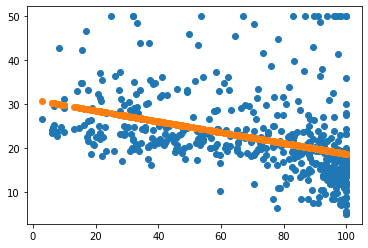

In [ ]:
import matplotlib.pyplot as plt

#Yの推定値を、求められた係数から導出する
estimate_Y = alpha + beta * X_AGE

#散布図にプロットする
plt.scatter(X_AGE, Y)
plt.scatter(X_AGE, estimate_Y)

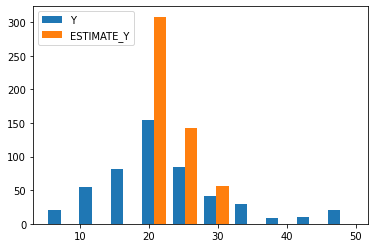

In [ ]:
#ヒストグラムにYの実測値とYの推定値をプロットする

plt.hist([Y_data, estimate_Y], label=['Y', 'ESTIMATE_Y'])
plt.legend(loc='upper left')
plt.show()

散布図やヒストグラムを眺める限り、なんとなく、Ageだけではpriceは説明しきれていない気がするグラフですね。そこで、どのくらいXがYを説明しきれているか把握することにします。

### 決定係数

決定係数は、回帰線の観測データに対する当てはまりの良さ(適合度)を示す尺度になります。

このとき、観測値Yとその平均値との差の平方和は

$$ Yの全変動 = \sum{(Y - \bar{Y})^2}$$

として表されます。一方、予測値(推定値)Yと平均値Yの差の平方和は、

$$ 回帰平方和 = \sum{(\hat{Y} - \bar{Y})^2}$$

となります。決定係数は、Yの全変動に対する、回帰平方和の比率として求めることが出来ます。そのため、

$$  R^2 = \frac{回帰平方和}{Yの全変動}
     = \frac{\sum{(\hat{Y} - \bar{Y})^2}}{\sum{(Y - \bar{Y})^2}}
     = 1 - \frac{\sum{(Y - \hat{Y})^2}}{\sum{(Y - \bar{Y})^2}}$$

と定義されます。

また、以下の式からも計算できます。

$$ R^2 = \frac{[n\sum XY - (\sum X) (\sum Y)]^2}{[n \sum X^2 - (\sum X )^2 ][n \sum Y^2 - (\sum Y )^2]} $$

決定係数については、多くの教科書などで「0.6以上ですと説明力の高いモデルです」などの記載があることがあります。が、ほとんどの場合研究者が学術論文をまとめるときには考慮されない気がします！そのため、こういう指標もあるんだなぁ。というくらいで捉えて頂けると良い気がします。

決定係数を実際にもとめてみましょう。

In [ ]:
#決定係数を求める

#Yの値を指定する. ここではPrice.
Y
#データ処理用にYをDataFrameからSeries に変換する
Y_data=Y["price"]
#Xの値を指定する.ここではAge.
X_AGE=X.AGE

#Yの合計値を求める
Y_SUM=np.sum(Y_data)
print("Y_Sum", Y_SUM)

#Yの合計値を求める
X_SUM=np.sum(X_AGE)
print("X_Sum", X_SUM)

#Xの自乗値の和を求める
X_POWER=np.sum(np.power(X_AGE,2))
print("X_POWER", X_POWER)

#Yの自乗値の和を求める
Y_POWER=np.sum(np.power(Y_data,2))
print("Y_POWER", Y_POWER)

#XとYをかけ合わせる
XY=np.sum(X_AGE*Y_data)
print("XY", XY)

#データの長さを求める
len_X=len(X_AGE)
len_Y=len(Y)
print("n", len_X)

#決定係数を求める
Determination = np.power(( len_X * XY - X_SUM * Y_SUM), 2) / ((len_X * X_POWER - np.power(X_SUM, 2)) * (len_X * Y_POWER - np.power(Y_SUM, 2)))

print("決定係数", Determination)


Y_Sum 11401.600000000002
X_Sum 34698.9
X_POWER 2779614.63
Y_POWER 299626.33999999997
XY 732581.1400000001
n 506
決定係数 0.14209474407780454


もうひとつ、定義式に基づき導出しましょう。

In [ ]:
#Yの全変動を求める
Y_move=np.sum(np.power(Y_data-Y_AVE, 2))
print("Yの全変動", Y_move)
#回帰平方和を求める
Y_square_sum = np.sum(np.power(Y_data-estimate_Y, 2))
print("回帰平方和", Y_square_sum)
#決定係数を求める
Determination2=Y_square_sum/Y_move
print("決定係数", Determination)

Yの全変動 42716.29541501977
回帰平方和 36646.53435007064
決定係数 0.14209474407780454


同じ結果になりましたね。ということで、このモデルのYの説明力は0.14くらいということになります。

### 残差

ここで、実値Yと推定値Yとの差分として残差uを求めることにします。残差が0より小さなときは過大推定, 残差が0より大きいときは過小推定と呼びます.

(array([ 20.,  77., 183., 115.,  46.,  24.,  12.,   7.,   9.,  13.]),
 array([-15.09661805, -10.45319681,  -5.80977557,  -1.16635433,
          3.47706691,   8.12048816,  12.7639094 ,  17.40733064,
         22.05075188,  26.69417312,  31.33759436]),
 <a list of 10 Patch objects>)

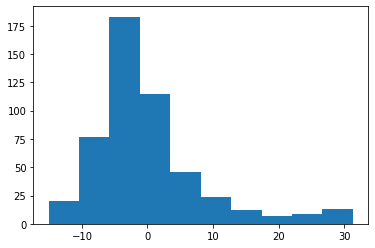

In [ ]:
#残差を求める
residual = Y_data-estimate_Y

#残差の分布をヒストグラムにする
plt.hist(residual)

### 回帰係数の検定

ここまで回帰式による決定係数と係数が求められたのですが、果たして本当にXがYを説明しているかを判断する必要があります。ここでは、t検定(たぶん、統計学の講義で聞いたことがあると思います)を使って、回帰係数が本当に有効かどうか、業界用語で呼ぶと、「有意であるか」を知る方法についてご説明します。

回帰係数が統計学的にゼロではないと判断されることが、「有意である」ということになります。回帰係数が有意ではないということは、説明変数Xは被説明変数Yに何の影響を与えていないことを示します。

**残差分散を推定する**



残差分散 s^2 を推定します。

$$ s^2 = \frac{残差平方和}{サンプルサイズ - 説明変数の数 - 1} = \frac{\sum{\hat{u}^2}}{n-2}$$

このとき、残差分散の平方根は残差の標準偏差と呼ばれます。


In [ ]:
#残差平方和を求める
Y_square_sum = np.sum(np.power(Y_data-estimate_Y, 2))
print("残差平方和", Y_square_sum)
s_square = Y_square_sum / (len_Y-2)
print("残差分散", s_square)
print("残差の標準偏差", np.sqrt(s_square))

残差平方和 36646.53435007064
残差分散 72.71137767871159
残差の標準偏差 8.527096673470496


**係数の分散を推定する**

αとβの分散を以下の式から推定します。

$$ s_\hat{\alpha}^2 = s^2 [\frac{1}{n}+\frac{\bar{X}}{\sum(X-\bar{X})^2}] = \frac{s^2 \sum X^2}{n \sum X^2 - (\sum X)^2} $$

$$ s_\hat{\beta}^2 = \frac{s^2}{\sum(X-\bar{X})^2} = \frac{s^2 n}{n \sum X^2 - (\sum X)^2}$$

実際に計算してみると、以下の通りになります。

In [ ]:
#αの分散を推定する

#Xの自乗値の和を求める
X_POWER=np.sum(np.power(X_AGE,2))
print("X_POWER", X_POWER)
#Xの和を求める
X_SUM = np.sum(X_AGE)
print("X_SUM", X_SUM)

s_square_alpha = (s_square * X_POWER) / (len_X * X_POWER - np.power(X_SUM,2))
print("αの分散", s_square_alpha)

#βの分散を推定する

s_square_beta = (s_square * len_X) / (len_X * X_POWER - np.power(X_SUM,2))
print("βの分散", s_square_beta)



X_POWER 2779614.63
X_SUM 34698.9
αの分散 0.9982134142837558
βの分散 0.00018171439385019367


**回帰係数の標準誤差を求める**

以下の式で、標準誤差を求めます。

$$ s_\hat{\alpha} = \sqrt{s_\hat{\alpha}^2} $$
$$ s_\hat{\beta} = \sqrt{s_\hat{\beta}^2} $$

In [ ]:
s_square_alpha_sd = np.sqrt(s_square_alpha)
s_square_beta_sd = np.sqrt(s_square_beta)
print("回帰係数の標準誤差_α",s_square_alpha_sd)
print("回帰係数の標準誤差_β",s_square_beta_sd)

回帰係数の標準誤差_α 0.9991063077990028
回帰係数の標準誤差_β 0.013480148139029988


**t値の計算を行う**

t値の計算を行います。

$$  t_\hat{\alpha} = \frac{回帰係数 alpha の推定値}{回帰係数 alpha の標準誤差} = \frac{\hat{\alpha}}{s_\hat{\alpha}} $$

$$  t_\hat{\beta} = \frac{回帰係数 beta の推定値}{回帰係数 beta の標準誤差} = \frac{\hat{\beta}}{s_\hat{\beta}} $$

In [ ]:
print("Alpha の推定値", alpha)
print("Beta の推定値", beta)
print("回帰係数の標準誤差_α",s_square_alpha_sd)
print("回帰係数の標準誤差_β",s_square_beta_sd)

t_alpha = alpha / s_square_alpha_sd
t_beta = beta / s_square_beta_sd

print("係数αのt値", t_alpha)
print("係数βのt値", t_beta)

Alpha の推定値 30.978677762618037
Beta の推定値 -0.12316272123567963
回帰係数の標準誤差_α 0.9991063077990028
回帰係数の標準誤差_β 0.013480148139029988
係数αのt値 31.006387929691897
係数βのt値 -9.136599981351706


**t検定を実施する**

t値に基づき、両側検定を用い係数が有意であるかの確認を行います。

以下のように、帰無仮説(null hypothesis)と対立仮説 (alternative hypothesis)を立てます。

$$ 
帰無仮説 \left\{
\begin{array}{ll}
H_0 & : \alpha = 0 \\
H'_0 & : \beta = 0
\end{array}
\right.
$$

$$ 
対立仮説 \left\{
\begin{array}{ll}
H_1 & : \alpha \neq 0 \\
H'_1 & : \beta \neq 0
\end{array}
\right.
$$

先程求めたt値は、自由度 n - 2 (サンプルサイズの数 - 説明変数の数 - 1) のt分布に従う。そのため、t分布表の値に基づいて有意性検定を行います。先程求めたt値が分布表にあるt値(臨界値)よりも大きければ、帰無仮説は棄却され、推定した回帰係数は有意であることになります。

今回の場合、サンプルサイズ=506, 説明変数=1なので, 自由度は504になります。
ここでは、Scipyパッケージのt分布パッケージから臨界値をそれぞれ求めることにします。

In [ ]:
from scipy.stats import t
p_10 = t.ppf(q=0.990, df=504)
p_5 = t.ppf(q=0.995, df=504)
p_1 = t.ppf(q=0.999, df=504)
print("有意水準10％", p_10)
print("有意水準5％", p_5)
print("有意水準1％", p_1)

有意水準10％ 2.333769400707735
有意水準5％ 2.585619233691325
有意水準1％ 3.1064810049788507


さきほど求めたt値の絶対値はそれぞれ、

In [ ]:
print("係数αのt値", np.abs(t_alpha))
print("係数βのt値", np.abs(t_beta))

係数αのt値 31.006387929691897
係数βのt値 9.136599981351706


のため、これらの臨界値を越えていることになります。かくして、有意水準は棄却され、推定した回帰係数は有意であることになります。

### StatsModelsを使った単回帰分析

さて、実は Python ではStatsmodelsというパッケージを用いることで、ここまで数十行に渡ってお届けしてきた係数の推定や決定係数の導出や検定などを、まとめて行うことが出来ます。大学の講義っぽいまどろっこしさでありますね！

まずは、先程と同じ単回帰モデルを以下の構文にて分析します。

In [ ]:
import statsmodels.api as sm
model = sm.OLS(Y, sm.add_constant(X.NOX))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b = results.params
print('a',a, 'b',b)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           7.07e-24
Time:                        06:17:45   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3459      1.811     22.828      0.0

回帰係数や決定係数などがまとめて表形式でプロットされたかと思います。そして、それぞれの値がPythonで逐次計算して来た値とほぼ同じになっていることをご確認頂けるかと思います。

(**データサイエンスのWebサイトや講義や教科書だと、こうした結果の出し方しか教えてくれなかったりするのですが、実は裏側でどういうロジックが動いているのかを知るのはとても大事だったりします。ということで、七面倒臭くはあるのですが、ひとつひとつ定式を追って、結果を見ることを是非試してください。**）

### log-log モデル

被説明変数、説明変数両辺の対数を取った形で分析を行います。

すなわち、

$$ ln Y = ln a + b_i ln X + \mu_i $$

を求めることになります。

ここでは、Xが1パーセント変化したときにYが何パーセント変化するかの弾力性を測定することになります。

In [ ]:
import statsmodels.api as sm
model = sm.OLS(np.log(Y), sm.add_constant(np.log(X.AGE)))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b = results.params
print('a',a, 'b',b)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.59
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.12e-19
Time:                        06:17:45   Log-Likelihood:                -223.40
No. Observations:                 506   AIC:                             450.8
Df Residuals:                     504   BIC:                             459.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0982      0.114     36.070      0.0

### semi-log モデル

被説明変数のみ対数を取った形にて回帰を行います。

すなわち、

$$ ln Y = ln a + b_i X + \mu_i $$

を求めることになります。

ここでは、Xが一単位変化したときのYの変分を求めることになります。

In [ ]:
import statsmodels.api as sm
model = sm.OLS(np.log(Y), sm.add_constant(X.AGE))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b = results.params
print('a',a, 'b',b)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           5.03e-27
Time:                        06:17:45   Log-Likelihood:                -206.57
No. Observations:                 506   AIC:                             417.1
Df Residuals:                     504   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4860      0.043     81.584      0.0

### 二次関数モデル

説明変数を自乗した値を含めたモデルで回帰を行います。

すなわち、

$$ Y = ln a + b_i X + c_i X^2+\mu_i $$

を求めることになります。

In [ ]:
import statsmodels.api as sm

#AGEを自乗した値を求める
X_power_list=np.power(X.AGE,2)

#変数リストを作成する
X_list2=pd.concat([X.AGE, X_power_list], axis=1)
name_list=["age", "age**2"]
X_list2.columns=name_list

model = sm.OLS(Y, sm.add_constant(X_list2))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b, c  = results.params
print('a',a, 'b',b, c)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     46.08
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           4.22e-19
Time:                        06:17:46   Log-Likelihood:                -1797.7
No. Observations:                 506   AIC:                             3601.
Df Residuals:                     503   BIC:                             3614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5674      1.885     14.097      0.0

## 重回帰分析

In [ ]:
import numpy as np

X_list=pd.concat([X.NOX, X.AGE, X.TAX], axis=1)

import statsmodels.api as sm
model = sm.OLS(np.log(Y), sm.add_constant(np.log(X_list)))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b, c, d = results.params
print('a',a, 'b',b, c, d)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     91.35
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           3.49e-47
Time:                        06:17:46   Log-Likelihood:                -154.59
No. Observations:                 506   AIC:                             317.2
Df Residuals:                     502   BIC:                             334.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4934      0.393     13.961      0.0

## レポート２（配点60点)

サンプルデータセットの変数Xのうち、CRIM, ZN, INDUS, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT からひとつ説明変数を選択し、被説明変数を Y (Price) として単回帰分析を行うこと。
このとき、
 - 回帰係数の推定
 - 決定係数の導出
 - 回帰係数の検定
 などを行い、説明変数が有意に寄与したか確認すること。
 
提出は、Google Colaboratory の共有リンクもしくは Jupyter Notebook の内容をTeams のDM経由で行うこと。2021/8/29 17:30 までを期限とする。